In [30]:
import Zillow.data as zd
import warnings
warnings.filterwarnings("ignore")

train, validation, test = zd.get_preprocessed_data()

In [31]:
LIMIT = 1

train_no_outliers = train[abs(train['logerror']) <= LIMIT]
validation_no_outliers = validation[abs(validation['logerror']) <= LIMIT]
test_no_outliers = test[abs(test['logerror']) <= LIMIT]

In [32]:
X_train, y_train = zd.split_x_y(train_no_outliers)
X_validation, y_validation = zd.split_x_y(validation_no_outliers)
X_test, y_test = zd.split_x_y(test_no_outliers)

In [33]:
from Zillow.models import BaseModel
from Zillow.metrics import print_measure

model = BaseModel()

model.fit(X_train, y_train)

print_measure(y_true=y_validation, y_pred=model.predict(X_validation))

Mean absolute error: 0.06286
 Mean squared error: 0.01339
           R2 score: -0.00000


In [34]:
drop_list = [
    'finishedsquarefeet12',
    'finishedsquarefeet12_was_nan',
    'taxamount',
    'taxamount_was_nan',
    'landtaxvaluedollarcnt',
    'landtaxvaluedollarcnt_was_nan',
    'taxdelinquencyflag',
    'x2_Mobile Home', 'x2_Manufactured, Modular, Prefabricated Homes',
       'x2_Cooperative', 'x2_Residential General',
       'x2_Commercial/Office/Residential mix', 'x2_Townhouse',
       'taxvaluedollarcnt_was_nan'
]

X_train = X_train.drop(drop_list, axis=1)
X_validation = X_validation.drop(drop_list, axis=1)
X_test = X_test.drop(drop_list, axis=1)

In [35]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print_measure(y_true=y_test, y_pred=y_pred)

Mean absolute error: 0.06183
 Mean squared error: 0.01260
           R2 score: 0.00784


In [47]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_jobs=-1,
                           max_features='log2',
                           min_samples_leaf=100,
                           min_samples_split=5,
                           n_estimators=700,
                           random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print_measure(y_true=y_test, y_pred=y_pred)

Mean absolute error: 0.06162
 Mean squared error: 0.01254
           R2 score: 0.01256


In [69]:
import Zillow.data as zd
from Zillow.transform import ZillowTransformer, ZillowEncoder
from Zillow.types import County, Features as ft

import warnings
warnings.filterwarnings("ignore")
# Orange
o_train, o_validation, o_test = zd.get_preprocessed_data(County.ORANGE)

# Ventura
v_train, v_validation, v_test = zd.get_preprocessed_data(County.VENTURA)

# Los Angeles
la_train, la_validation, la_test = zd.get_preprocessed_data(County.LOS_ANGELES)

In [70]:
o_train = o_train[abs(o_train['logerror']) <= LIMIT]
o_validation = o_validation[abs(o_validation['logerror']) <= LIMIT]
o_test = o_test[abs(o_test['logerror']) <= LIMIT]

v_train = v_train[abs(v_train['logerror']) <= LIMIT]
v_validation = v_validation[abs(v_validation['logerror']) <= LIMIT]
v_test = v_test[abs(v_test['logerror']) <= LIMIT]

la_train = la_train[abs(la_train['logerror']) <= LIMIT]
la_validation = la_validation[abs(la_validation['logerror']) <= LIMIT]
la_test = la_test[abs(la_test['logerror']) <= LIMIT]

In [71]:
drop_list = [
    'finishedsquarefeet12',
    'finishedsquarefeet12_was_nan',
    'taxamount',
    'taxamount_was_nan',
    'landtaxvaluedollarcnt',
    'landtaxvaluedollarcnt_was_nan',
    'taxdelinquencyflag',
    'taxvaluedollarcnt_was_nan',
]

In [72]:
import pandas as pd

train = pd.concat([o_train, o_validation], axis=0, ignore_index=True)
X_train_o, y_train_o = zd.split_x_y(train)
X_test_o, y_test_o = zd.split_x_y(o_test)

X_train_o = X_train_o.drop(drop_list, axis=1)
X_test_o = X_test_o.drop(drop_list, axis=1)

feature_selector = RandomForestRegressor(n_jobs=-1,
                           max_features='log2',
                           min_samples_leaf=100,
                           min_samples_split=5,
                           n_estimators=700,
                           random_state=42)

feature_selector.fit(X_train_o, y_train_o)

y_pred = feature_selector.predict(X_test_o)

print_measure(y_true=y_test_o, y_pred=y_pred)

Mean absolute error: 0.05396
 Mean squared error: 0.00918
           R2 score: 0.01135


In [73]:
train = pd.concat([v_train, v_validation], axis=0, ignore_index=True)
X_train_v, y_train_v = zd.split_x_y(train)
X_test_v, y_test_v = zd.split_x_y(v_test)

X_train_v = X_train_v.drop(drop_list, axis=1)
X_test_v = X_test_v.drop(drop_list, axis=1)

feature_selector = RandomForestRegressor(n_jobs=-1,
                           max_features='log2',
                           min_samples_leaf=100,
                           min_samples_split=5,
                           n_estimators=700,
                           random_state=42)

feature_selector.fit(X_train_v, y_train_v)

y_pred = feature_selector.predict(X_test_v)

print_measure(y_true=y_test_v, y_pred=y_pred)

Mean absolute error: 0.05091
 Mean squared error: 0.00922
           R2 score: 0.01168


In [74]:
train = pd.concat([la_train, la_validation], axis=0, ignore_index=True)
X_train_la, y_train_la = zd.split_x_y(train)
X_test_la, y_test_la = zd.split_x_y(la_test)

X_train_la = X_train_la.drop(drop_list, axis=1)
X_test_la = X_test_la.drop(drop_list, axis=1)

feature_selector = RandomForestRegressor(n_jobs=-1,
                           max_features='log2',
                           min_samples_leaf=100,
                           min_samples_split=5,
                           n_estimators=700,
                           random_state=42)

feature_selector.fit(X_train_la, y_train_la)

y_pred = feature_selector.predict(X_test_la)

print_measure(y_true=y_test_la, y_pred=y_pred)

Mean absolute error: 0.06701
 Mean squared error: 0.01432
           R2 score: 0.01232


Text(0.5, 1.0, 'MAE per area with random forest')

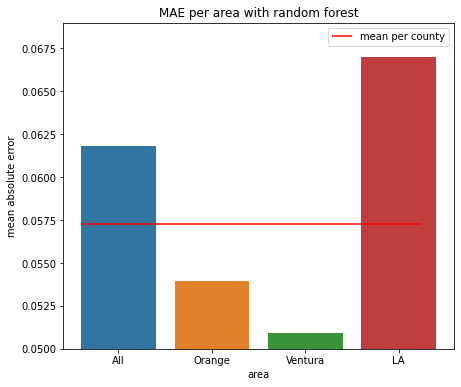

In [76]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(7, 6))
data = pd.DataFrame({'score': [0.06183, 0.05396, 0.05091, 0.06701], 'area': ['All', 'Orange', 'Ventura', 'LA']})
sns.barplot(data=data, x='area', y='score', ax=ax)
ax.set_ylim(0.050,0.069);
ax.set_ylabel('mean absolute error')
ax.hlines(np.mean([0.05396, 0.05091, 0.06701]), xmin=-0.4, xmax=3.25, colors='red', label='mean per county');
ax.legend()
ax.set_title('MAE per area with random forest')